# Metaheuristics

optimization methods can be classified by three factors:
* determined/stochastic search
* blind/guided search (exhaust all solutions or make search dependent on previous search), guided search can be single-state or pupulation-based
* naturally inspired or not

multiple optimization methods can be used together (e.g. population-based method to quickly identify interesting search regions and then single-state method to improve solutions)

## <font color='red'>Problems</color>

### <font color='blue'>Binary</font>

#### <font color='green'>Sum of bits</font>

evaluation function

$f(x)=\sum\limits^{D}_{i=1}x_i$

In [7]:
sumbin = function(x){
    sum(as.numeric(x))
}

number of dimensions

In [10]:
D = 8

matrix encoding

In [8]:
binint = function(x, D){
    x = rev(intToBits(x)[1:D])
    as.numeric(unlist(strsplit(as.character(x), ""))[(1:D) * 2])
}

In [9]:
x = 0:(2^D - 1)

In [10]:
search = t(sapply(x, binint, D = D))

In [11]:
head(search)

0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0
0,0,0,0,0,0,1,1
0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,1


tree encoding

In [35]:
domain = vector("list", D)

In [36]:
for(i in 1:D){
    domain[[i]] = c(0,1)
}

In [37]:
domain

[[1]]
[1] 0 1

[[2]]
[1] 0 1

[[3]]
[1] 0 1

[[4]]
[1] 0 1

[[5]]
[1] 0 1

[[6]]
[1] 0 1

[[7]]
[1] 0 1

[[8]]
[1] 0 1

Variation of sum of bits problem for maximization tasks in optim

In [13]:
minsumbin = function(x){
    (length(x) - sum(x))
}

#### <font color='green'>Max sin</font>

$x'=\sum\limits^{D}_{i=1}x_i2^{i-1}$

$\max\hspace{0.2cm}f(x)=\sin(\pi\frac{x'}{2^D})$

In [1]:
intbin = function(x){
    sum(2^(which(rev(x == 1)) - 1))
}

In [2]:
maxsin = function(x, Dim){
    sin(pi * (intbin(x)) / (2^Dim))
}

for Tabu search

In [26]:
maxsin = function(x){
    D = length(x);
    x = intbin(x);
    return(sin(pi * (as.numeric(x)) / (2^D)))
}

### <font color='blue'>Integer</font>

#### <font color='green'>Bag prices</font>

finds optimum prices for several different products, maximizing profit

expected sales (x, A, B, C, m)
- x: prices per product (vector, 1:1000)
- A: constant
- B: constant
- C: constant
- m(x): marketing effort

In [11]:
sales = function(x, A = 1000, B = 200, C = 141, m = seq(2, length.out = length(x), by = -0.25)){
    return(round(m * (A / log(x + B) - C), digits = 0))
}

production cost (units, A, u)
- depends on expected sales
- units: expected sales per product (output of sales function, vector)
- A: constant
- u(units): manufacturing cost

In [12]:
cost = function(units, A = 100, u = 35 - 5 * (1:length(units))){
    return(A + u * units)
}

profit (x)

* x is binary vector denoting the price of each product

$f(x)=\sum\limits^{D}_{i=1}x_i\times sales(x_i)-cost(x_i)$

In [13]:
profit = function(x){
    x = round(x, digits = 0)
    s = sales(x)
    c = cost(s)
    profit = sum((s * x - c))
    return(profit)
}

for maximization task in optim

In [24]:
eval = function(x){
    -profit(x)
}

### <font color='blue'>Continuous</font>

#### <font color='green'>Sphere</font>

$f(x)=\sum\limits^{D}_{i=1}x^2_i$

In [9]:
sphere = function(x){
    sum(x^2)
}

#### <font color='green'>Rastrigin</font>

$f(x)=\sum\limits^{D}_{i=1}(x^2_i-10\cos2\pi x_i+10)$

In [5]:
rastrigin = function(x){
    10 * length(x) + sum(x^2 - 10 * cos(2 * pi * x))
}

## <font color='red'>Deterministic</font>

### <font color='blue'>Single-state search</font>

* if evaluation landscape is too noisy or complex with several multiple minima population-based methods are more useful
* faster and less computationally expensive than population-based methods

#### <font color='green'>Full blind search</font>

* only applicable to discrete spaces
* always finds optimum if full search space is tested
* computationally expensive, thus not useful for real-world examples
* can be encoded in two ways (matrix or tree)
* for traversing the tree encoding depth-first or breadth-first algorithm can be used

**Matrix encoding (fsearch)**

In [7]:
fsearch = function(search, FUN, type = "min", ...){
    x = apply(search, 1, FUN, ...) # applies function to each row of matrix
    ib = switch(type, min = which.min(x), max = which.max(x)) # gets row number of min/max value
    return(list(index = ib, sol = search[ib,], eval = x[ib])) # row number, solution and result
}

**Tree encoding (dfsearch)**

In [8]:
dfsearch = function(l = 1,
                    b = 1,
                    domain,
                    FUN,
                    type = "min",
                    D = length(domain),
                    x = rep(NA, D),
                    bcur = switch(type, min = list(sol = NULL, eval = Inf),
                                        max = list(sol = NULL, eval = -Inf)),
                                        ...){
    if((l - 1) == D){
        
        f = FUN(x, ...); fb = bcur$eval
        ib = switch(type, min = which.min(c(fb, f)),
                          max = which.max(c(fb, f)))
        if(ib == 1) return(bcur) else return(list(sol = x, eval = f))
            
    } else {
        
        for(j in 1:length(domain[[l]])){
            x[l] = domain[[l]][j]
            bcur = dfsearch(l + 1, j, domain, FUN, type, D = D, x = x, bcur = bcur, ...)
        }
        return(bcur)
        
    }
}

##### <font color='orange'>Sum of bits</font>

In [42]:
fsearch(search, sumbin, "max")

$index
[1] 256

$sol
[1] 1 1 1 1 1 1 1 1

$eval
[1] 8

In [55]:
dfsearch(domain = domain, FUN = sumbin, type = "max")

$sol
[1] 1 1 1 1 1 1 1 1

$eval
[1] 8

##### <font color='orange'>Max sin</font>

In [60]:
fsearch(search, maxsin, "max", Dim = D)

$index
[1] 129

$sol
[1] 1 0 0 0 0 0 0 0

$eval
[1] 1

In [61]:
dfsearch(domain = domain, FUN = maxsin, type = "max", Dim = D)

$sol
[1] 1 0 0 0 0 0 0 0

$eval
[1] 1

##### <font color='orange'>Bag prices</font>

- only works if prices can be calculated independently
- D is the number of different products
- search is a matrix where prices all products except on are kept constant (= 1), to only get optimum price for each product

In [12]:
ibag = function(D){
    x = 1:1000
    search = matrix(ncol = D, nrow = length(x))
    search[] = 1; search[, D] = x
    S1 = fsearch(search, profit, "max")
    S1$sol[D]
}

In [13]:
(S = sapply(1:5, ibag))

[1] 414 404 408 413 395

In [14]:
profit(S)

[1] 43899

#### <font color='green'>Grid search</font>

* blind search method
* reduces search space and is thus more feasible than full blind search
* useful for hyperparameter optimization in ML
* different versions of grid search exist (uniform design search / nested grid search)
* nested grid search incorporates several grid levels with different granularity (not pure blind method since next search is guided by previous one)
* can be use for real value problems if number of dimesions is small enough
* not very useful for high dimensional problems due to cures of dimensionality

##### <font color='purple'>Uniform design search (using fsearch with matrix encoding of search space)</font>

* complexity $\mathcal{O}(L^D)$ with $L$ being the number of levels and $D$ the number of dimensions
* domain: matrix with search grid for all dimensions
* LS: number of max combinations
* L: vector with grid length for each dimension
* s: final matrix containing grid search space

In [5]:
gsearch = function(step, lower, upper, FUN, type = "min", ...){
    
    D = length(step)
    domain = vector("list", D) # empty list of length D / domain values
    L = vector(length = D) # empty vector of length D
    
    for(i in 1:D){
        domain[[i]] = seq(lower[i], upper[i], by = step[i]) # writes search grid for each dimension in row of matrix domain
        L[i] = length(domain[[i]]) # writes length of each search grid into vector
    }
    
    LS = prod(L) # product of all vector values / used to create rows for all combinations of search grids in matrix
    s = matrix(ncol = D, nrow = LS) # create empty matrix for all search space combinations
    
    for(i in 1:D){ # fill in values of final matrix column by column, same can be achieved using expand.grid

        if(i == 1){
            E = 1
        } else {
            E = E * L[i - 1]
        }
        
        s[, i] = rep(domain[[i]], length.out = LS, each = E)
    }
    
    fsearch(s, FUN, type, ...)
    
}

###### <font color='orange'>Bag prices</font>

In [9]:
gsearch(rep(100, 5), rep(1, 5), rep(1000, 5), profit, "max")

$index
[1] 54445

$sol
[1] 401 401 401 401 501

$eval
[1] 43142

###### <font color='orange'>Sphere</font>

In [8]:
gsearch(rep(1.1, 2), rep(-5.2, 2), rep(5.2, 2), sphere, "min")

$index
[1] 56

$sol
[1] 0.3 0.3

$eval
[1] 0.18

###### <font color='orange'>Rastrigin</font>

In [9]:
gsearch(rep(1.1, 2), rep(-5.2, 2), rep(5.2, 2), rastrigin, "min")

$index
[1] 34

$sol
[1] -1.9 -1.9

$eval
[1] 11.03966

##### <font color='purple'>Uniform design search (using dfsearch with tree encoding of search space)</font>

* less code than with fsearch because no search space matrix has to be created

In [10]:
gsearch2 = function(step, lower, upper, FUN, type = "min", ...){
    
    D = length(step)
    domain = vector("list", D) # empty list of length D / domain values
    
    for(i in 1:D){ # writes search grid for each dimension in row of matrix domain
        domain[[i]] = seq(lower[i], upper[i], by = step[i])
    }
    
    dfsearch(domain = domain, FUN = FUN, type = type, ...)
    
}

###### <font color='orange'>Bag prices</font>

In [13]:
gsearch2(rep(100, 5), rep(1, 5), rep(1000, 5), profit, "max")

$sol
[1] 401 401 401 401 501

$eval
[1] 43142

##### <font color='purple'>Nested grid search (using fsearch / gsearch)</font>

* all three if blocks will be checked on each loop until stop critera becomes TRUE
* can also be used with dfsearch

In [10]:
ngsearch = function(levels, step, lower, upper, FUN, type, ...){
    
    stop = FALSE; i = 1
    
    bcur = switch(type, min = list(sol = NULL, eval = Inf), # initialize empty list for current solution
                        max = list(sol = NULL, eval = -Inf))
    
    while(!stop){ # run until stop becomes TRUE
        
        s = gsearch(step, lower, upper, FUN, type, ...)
        
        # block 1: update best current solution
        
        if((type == "min" && s$eval < bcur$eval) || (type == "max" && s$eval > bcur$eval)){
            bcur = s
        }
        
        # block 2: resize grid for next run in gsearch
        
        if(i < levels){
            step = step / 2
            interval = (upper - lower) / 4
            lower = sapply(lower, max, s$sol - interval)
            upper = sapply(upper, min, s$sol + interval)
        }
        
        # block 3: stop criteria, maximum level reached and/or 
        
        if(i >= levels || sum((upper - lower) <= step) > 0){ 
            stop = TRUE
        } else {
            i = i + 1
        }
        
    }
    
    return(bcur)
    
}

###### <font color='orange'>Bag prices</font>

In [20]:
ngsearch(3, rep(500, 5), rep(1, 5), rep(1000, 5), profit, "max")

$index
[1] 25

$sol
[1] 376.375 376.375 376.375 501.375 501.375

$eval
[1] 42823

###### <font color='orange'>Sphere</font>

In [11]:
ngsearch(3, rep(3, 2), rep(-5.2, 2), rep(5.2, 2), sphere, "min")

$index
[1] 11

$sol
[1] -0.1 -0.1

$eval
[1] 0.02

<span class="mark">Rastrigin</span>

In [12]:
ngsearch(3, rep(3, 2), rep(-5.2, 2), rep(5.2, 2), rastrigin, "min")

$index
[1] 1

$sol
[1] -0.1 -0.1

$eval
[1] 3.83966

#### <font color='green'>Simple hill climbing</font>

* initial solution can be chosen using domain knowledge or randomly selected
* deterministic, applies full search in neighbourhood of current solution to update solution
* finds N solutions in the neighbourhood of current solution and selects the best
* par: initial solution
* fn: evaluation function
* change: function to generate next candidate, defined seperately (either random change or full neigbourhood check)
* control: list with stopping and monitoring method, has to be defined by user
* other variations: steepest ascent hill climbing, shotgun hill climbing

In [12]:
hclimbing = function(par, fn, change, lower, upper, control, type = "min", ...){
    
    fpar = fn(par, ...)
    
    for(i in 1:control$maxit){
        
        par1 = change(par, lower, upper)
        fpar1 = fn(par1, ...)
        
        # give current result if control$REPORT bigger than one and equal one and/or i is a divisor of control$REPORT
        
        if(control$REPORT > 0 && (i == 1 || i %% control$REPORT == 0)){
            cat("i:", i, "s:", par, "f:", fpar, "s':", par1, "f:", fpar1, "\n")
        }
        
        # replace current losution fpar with fpar1 if new result is better (switch both values)
        
        if((type == "min" && fpar1 < fpar) || (type == "max" && fpar1 > fpar)){
            par = par1
            fpar = fpar1
        }
        
    }
    
    # stop criteria and final result
    
    if(control$REPORT >= 1){
        cat("best:", par, "f:", fpar, "\n")
    }
    
    return(list(sol = par, eval = fpar))
    
}

function to change current solution

* par: current solution
* lower/upper: boundaries on new solution
* dist: distribution to generate new solution
* round: discrete or real-value

In [3]:
hchange = function(par, lower, upper, dist = rnorm, round = TRUE, ...){
    
    D = length(par)
    step = dist(D, ...)
    
    if(round){
        step = round(step)
    }
    
    par1 = par + step # ad random value to initial solution value
    
    return(ifelse(par1 < lower, lower, ifelse(par1 > upper, upper, par1)))
    
}

##### <font color='orange'>Sum of bits</font>

In [41]:
s = rep(0, D)

In [42]:
C = list(maxit = 10, REPORT = 1)

In [52]:
hclimbing(s, sumbin, hchange, lower = rep(0, D), upper = rep(1, D), control = C, type = "max")

i: 1 s: 0 0 0 0 0 0 0 0 f: 0 s': 0 0 0 1 0 1 0 0 f: 2 
i: 2 s: 0 0 0 1 0 1 0 0 f: 2 s': 1 1 0 1 1 0 0 0 f: 4 
i: 3 s: 1 1 0 1 1 0 0 0 f: 4 s': 1 1 1 1 1 1 1 0 f: 7 
i: 4 s: 1 1 1 1 1 1 1 0 f: 7 s': 0 1 1 1 1 1 0 0 f: 5 
i: 5 s: 1 1 1 1 1 1 1 0 f: 7 s': 1 0 1 0 0 0 0 0 f: 2 
i: 6 s: 1 1 1 1 1 1 1 0 f: 7 s': 1 1 0 0 0 1 1 0 f: 4 
i: 7 s: 1 1 1 1 1 1 1 0 f: 7 s': 1 0 1 1 1 0 0 1 f: 5 
i: 8 s: 1 1 1 1 1 1 1 0 f: 7 s': 1 1 1 0 0 0 0 0 f: 3 
i: 9 s: 1 1 1 1 1 1 1 0 f: 7 s': 0 1 1 0 1 1 1 0 f: 5 
i: 10 s: 1 1 1 1 1 1 1 0 f: 7 s': 1 1 1 1 1 1 1 0 f: 7 
best: 1 1 1 1 1 1 1 0 f: 7 


$sol
[1] 1 1 1 1 1 1 1 0

$eval
[1] 7

##### <font color='orange'>Bag prices</font>

In [56]:
D = 5

In [57]:
C = list(maxit = 10000, REPORT = 10000)

In [60]:
s = sample(1:1000, D, replace = TRUE)

In [64]:
hclimbing(s, profit, hchange, lower = rep(1, D), upper = rep(1000, D), control = C, type = "max")

i: 1 s: 599 736 714 117 576 f: 31094 s': 598 738 713 116 577 f: 31054 
i: 10000 s: 612 749 714 146 603 f: 32471 s': 611 750 714 148 603 f: 31681 
best: 612 749 714 146 603 f: 32471 


$sol
[1] 612 749 714 146 603

$eval
[1] 32471

##### <font color='orange'>Sphere</font>

In [71]:
D = 2

In [72]:
C = list(maxit = 10000, REPORT = 10000)

In [73]:
s = runif(D, -5.2, 5.2)

In [74]:
rchange = function(par, lower, upper){
    hchange(par, lower, upper, dist = rnorm, round = FALSE, mean =0, sd = 0.5)
}

In [75]:
hclimbing(s, sphere, rchange, lower = rep(-5.2, D), upper = rep(5.2, D), control = C, type = "min")

i: 1 s: -2.660334 3.488597 f: 19.24768 s': -3.747561 2.761324 f: 21.66912 
i: 10000 s: -0.004885067 0.004227071 f: 4.173201e-05 s': 0.06902489 -0.1102776 f: 0.01692559 
best: -0.004885067 0.004227071 f: 4.173201e-05 


$sol
[1] -0.004885067  0.004227071

$eval
[1] 4.173201e-05

#### <font color='green'>Tabu search</font>

* can be deterministic or stochastic depending on which search function is being used
* variation of hill climbing algorithm with short-term memory of recent changes to avoid getting stuck in local optima
* `configKeep` stores last solutions, `eUtilityKeep` stores the respective function values

##### <font color='orange'>Sum of bits</font>

In [27]:
library(tabuSearch)

In [28]:
D = 8

In [29]:
s = rep(0, D)

In [30]:
(s = tabuSearch(D, iters = 2, objFunc = sumbin, config = s, neigh = 2, listSize = 4, nRestarts = 1))

$type
[1] "binary configuration"

$configKeep
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    0    0    0    0    0    0    0    0
[2,]    0    0    0    0    0    1    0    0
[3,]    0    0    0    0    0    1    0    0
[4,]    0    0    0    0    0    1    1    0
[5,]    0    0    0    0    0    0    1    0
[6,]    1    0    0    0    0    0    1    0

$eUtilityKeep
[1] 0 1 1 2 1 0

$iters
[1] 2

$neigh
[1] 2

$listSize
[1] 4

$repeatAll
[1] 1

attr(,"class")
[1] "tabu"

best solution with maximum function value

In [22]:
(b = which.max(s$eUtilityKeep))

[1] 5

best solution

In [25]:
s$configKeep[b, ]

[1] 1 1 1 1 1 1 1 1

##### <font color='orange'>Max sin</font>

In [31]:
D = 8

In [32]:
s = rep(0, D)

In [33]:
tabuSearch(D, iters = 2, objFunc = maxsin, config = s, neigh = 2, listSize = 4, nRestarts = 1)

$type
[1] "binary configuration"

$configKeep
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]    0    0    0    0    0    0    0    0
[2,]    0    0    1    0    0    0    0    0
[3,]    0    0    1    0    0    0    0    0
[4,]    1    0    1    0    0    0    0    0
[5,]    0    0    0    0    1    0    0    0
[6,]    0    0    0    1    1    0    0    0

$eUtilityKeep
[1] 0.00000000 0.38268343 0.38268343 0.92387953 0.09801714 0.29028468

$iters
[1] 2

$neigh
[1] 2

$listSize
[1] 4

$repeatAll
[1] 1

attr(,"class")
[1] "tabu"

### <font color='blue'>Population-based search</font>

* performs simultaneous search in different regions and perform better than single-state search methods
* computationally more expensive than single-state methods
* originally used for discrete and combinatorial problems but can be extended for real-value problems
* memory can be short, medium or long-term depending on how wide the exploration of the search space should be

#### <font color='green'>Monte Carlo Search</font>

* blind search method
* reduces search space and is thus more feasible than full blind search
* computational complexity is * complexity $\mathcal{O}(N)$
* unlike grid search also useful for higher dimensional problems
* randomly generates N points using a probability distribution (in this example uniform distribution)

In [6]:
mcsearch = function(N, lower, upper, FUN, type = "min", ...){
    
    D = length(lower)
    s = matrix(nrow = N, ncol = D)
    
    for(i in 1:N){
        s[i, ] = runif(D, lower, upper)
    }
    
    fsearch(s, FUN, type, ...)
    
}

##### <font color='orange'>Bag prices</font>

In [9]:
mcsearch(10000, rep(1, 5), rep(1000, 5), profit, "max")

$index
[1] 5295

$sol
[1] 466.9342 383.9217 357.5605 446.6179 448.5442

$eval
[1] 42753

##### <font color='orange'>Sphere</font>

In [12]:
mcsearch(10000, rep(-5.2, 2), rep(5.2, 2), sphere, "min")

$index
[1] 9087

$sol
[1] -0.004094166  0.079717530

$eval
[1] 0.006371647

##### <font color='orange'>Rastrigin</font>

In [22]:
mcsearch(10000, rep(-5.2, 2), rep(5.2, 2), rastrigin, "min")

$index
[1] 8366

$sol
[1]  0.03789799 -0.01736106

$eval
[1] 0.3433427

## <font color='red'>Stochastic</font>

### <font color='blue'>Single-state search</font>

#### <font color='green'>Stochastic hill climbing</font>

* initial solution can be chosen using domain knowledge or randomly selected
* stochastic, applies random chanes to current solution
* fixed probability T to accept an inferior soltion and to avoid being stuck in local optima
* unlike in simualted annealing the probability T is fixed

#### <font color='green'>Simulated annealing</font>

* for high temperaturs more like Monte Carlo Search and a global method, as T cools down more like hill climbing algorithm and a local search method
* maxit: maximum number of iterations
* T: initial temperature
* tmax: number of evaluations at each temperature
* new search points are generated using Gaussian Markov kernel with scale propotional to the temperature
* control: list with parameters
* optim implementation does not handle lower/upper bounds (change function needs to handle that), only handle minimization (evaluation function needs to be adapted for maximization)

##### <font color='orange'>Sum of bits</font>

In [7]:
D = 8

In [8]:
s = rep(0, D)

In [9]:
C = list(maxit = 10, temp = 10, tmax = 1, trace = TRUE, REPORT = 1)

need to create search function based on hchange to set boundaries 0/1 for all D values

In [10]:
bchange = function(par){
    D = length(par)
    hchange(par, lower = rep(0, D), upper = rep(1, D), rnorm, mean = 0, sd = 1)
}

In [14]:
optim(s, minsumbin, gr = bchange, method = "SANN", control = C)

sann objective function values
initial       value 8.000000
iter        1 value 7.000000
iter        2 value 4.000000
iter        3 value 4.000000
iter        4 value 4.000000
iter        5 value 2.000000
iter        6 value 2.000000
iter        7 value 1.000000
iter        8 value 1.000000
iter        9 value 1.000000
final         value 1.000000
sann stopped after 9 iterations


$par
[1] 1 1 1 1 1 0 1 1

$value
[1] 1

$counts
function gradient 
      10       NA 

$convergence
[1] 0

$message
NULL

##### <font color='orange'>Bag prices</font>

In [15]:
D = 5

In [16]:
C = list(maxit = 10000, temp = 1000, trace = TRUE, REPORT = 10000)

In [17]:
s = sample(1:1000, D, replace = TRUE)

In [18]:
ichange = function(par){
    D = length(par)
    hchange(par, lower = rep(1, D), upper = rep(1000, D), rnorm, mean = 0, sd = 1)
}

In [25]:
optim(s, eval, gr = ichange, method = "SANN", control = C)

sann objective function values
initial       value -31588.000000
final         value -41491.000000
sann stopped after 9999 iterations


$par
[1] 559 461 498 578 327

$value
[1] -41491

$counts
function gradient 
   10000       NA 

$convergence
[1] 0

$message
NULL

##### <font color='orange'>Sphere</font>

In [27]:
D = 2

In [28]:
C = list(maxit = 10000, temp = 1000, trace = TRUE, REPORT = 10000)

In [29]:
s = runif(D, -5.2, 5.2)

In [30]:
optim(s, sphere, method = "SANN", control = C)

sann objective function values
initial       value 39.095956
final         value 2.747438
sann stopped after 9999 iterations


$par
[1] 1.655339 0.085382

$value
[1] 2.747438

$counts
function gradient 
   10000       NA 

$convergence
[1] 0

$message
NULL

### <font color='blue'>Population-based search</font>

* as opposed to single-state search there is more than one candisate solution (population of candidates)

#### <font color='green'>Genetic algorithm (GA)</font>

* initially just for discrete problems but now also for real-valued ones
* individual: one candidate solution
* population: pool of individuals
* genome/chromosome: individual data structure representation
* gene: value position in individual data structure representation (genome)
* allele: particular value of value position (gene)
* fitness: evaluation function
* breeding: creation of new solutions
* crossover: selecting two ore more parent solutions to generate children
* mutation: performs slight changes to individual

In [6]:
library(GA)

Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.1.1
Type 'citation("GA")' for citing this R package in publications.


define Rastrigin function

In [1]:
Rastrigin <- function(x1, x2){
    20 + x1^2 + x2^2 -10 * (cos(2 * pi * x1) + cos(2 * pi * x2))
}

##### <font color='purple'>Visualize function</font>

In [2]:
x1 <- x2 <- seq(-5.12, 5.12, by = 0.1)

calculate the outer product of two vectors x1, x2 and apply Rastrigin function to resulting matrix

In [3]:
f <- outer(x1, x2, Rastrigin)

3d visualization of Rastrigin function

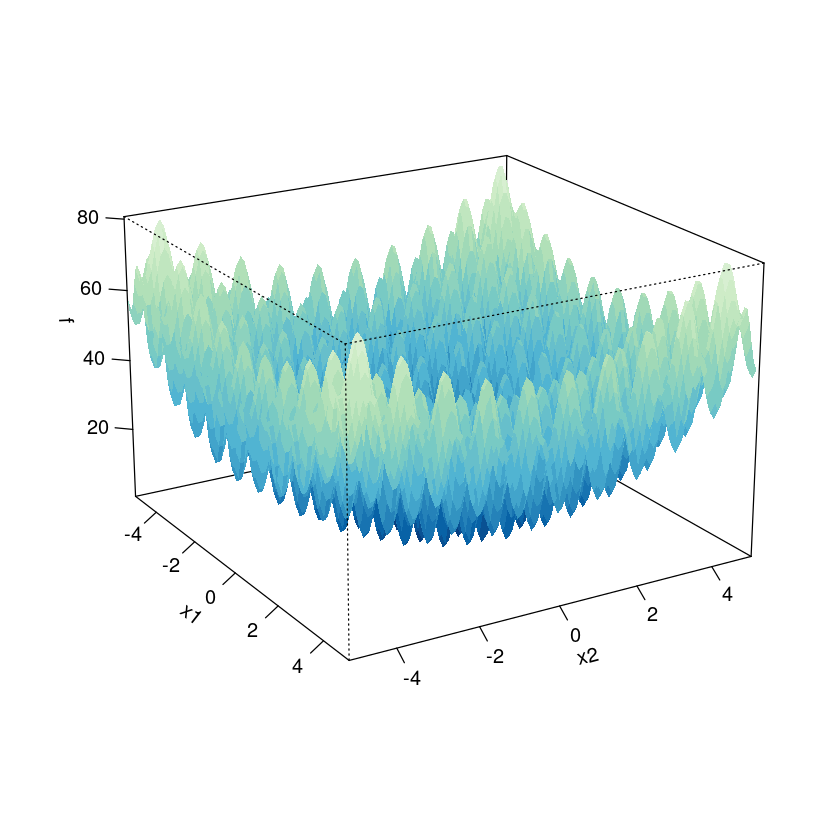

In [9]:
persp3D(x1, x2, f, theta = 59, phi = 20, color.palette = bl2gr.colors)

In [11]:
GA <- ga(type = "real-valued",
         fitness = function(x) -Rastrigin(x[1], x[2]),
         lower = c(-5.12, -5.12),
         upper = c(5.12, 5.12),
         popSize = 50,
         maxiter = 1000,
         run = 100)

In [12]:
summary(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
         x1    x2
lower -5.12 -5.12
upper  5.12  5.12

GA results: 
Iterations             = 386 
Fitness function value = -0.1163808 
Solution = 
               x1         x2
[1,] -0.006791666 0.02326928

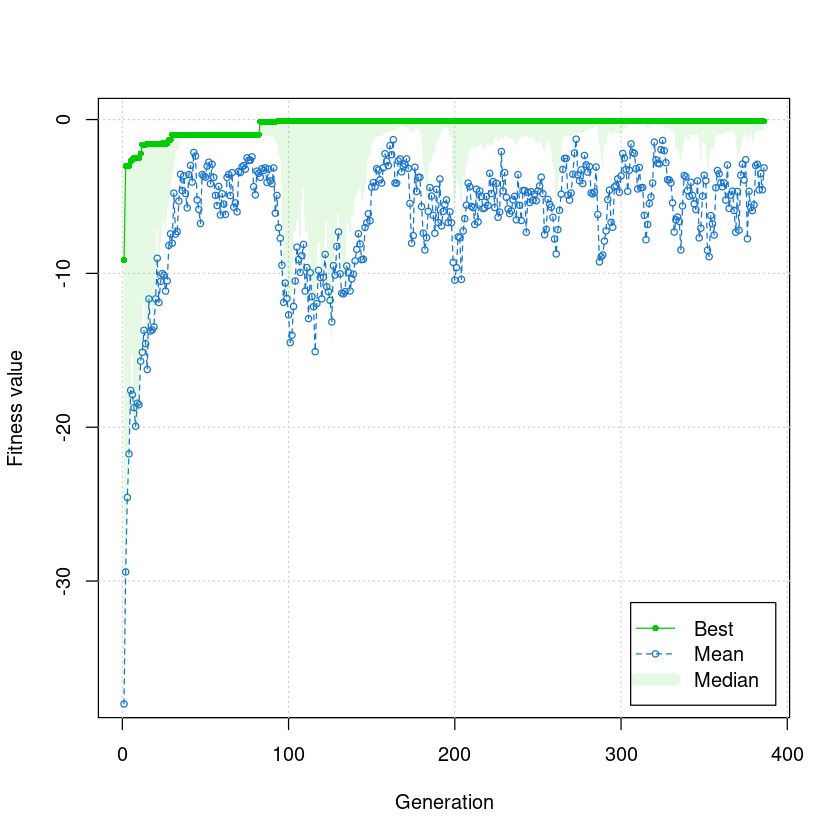

In [13]:
plot(GA)

##### <font color='purple'>Visualization in real-time</font>

In [14]:
monitor <- function(obj){
    contour(x1, x2, f, drawlabels = FALSE, col = grey(0.5))
    title(paste("iteration =", obj@iter), font.main = 1)
    points(obj@population, pch = 20, cole = 2)
    Sys.sleep(0.2)
}

In [ ]:
GA <- ga(type = "real-valued",
         fitness = function(x) -Rastrigin(x[1], x[2]),
         lower = c(-5.12, -5.12),
         upper = c(5.12, 5.12),
         popSize = 50,
         maxiter = 100,
         monitor = monitor)

##### <font color='purple'>Passing initial solution candidates (seeding)</font>

* can be helpful with domain knowledge
* number of initial defined candidates cannot exceed popSize (size of population in each generation)
* solutions that are not defined will be created by random as usual

In [16]:
suggestedSol <- matrix(c(0.2, 1.5, -1.5, 0.5), nrow = 2, ncol = 2, byrow = TRUE)

In [17]:
GA <- ga(type = "real-valued",
         fitness = function(x) -Rastrigin(x[1], x[2]),
         lower = c(-5.12, -5.12),
         upper = c(5.12, 5.12),
         popSize = 50,
         maxiter = 1,
         suggestions = suggestedSol)

initial population with self-defined candidates (first rows only)

In [19]:
head(GA@population)

0.200000,1.5000000
-1.500000,0.5000000
-3.960868,3.4308278
1.462591,4.9585467
-4.780094,0.3588750
-3.541396,-0.8981802


##### <font color='purple'>Optimization with constraints</font>

In [20]:
f <- function(x){
    100 * (x[1]^2 - x[2])^2 + (1 - x[1])
}

In [21]:
c1 <- function(x){
    x[1] * x[2] + x[1] - x[2] + 1.5
}

In [22]:
c2 <- function(x){
    10 - x[1] * x[2]
}

function wrapper to include penalties in fitness function

In [23]:
fitness <- function(x){
    
    f <- -f(x) # maximize
    pen <- sqrt(.Machine$double.xmax) # penalty sqrt of max machine float
    penalty1 <- max(c1(x), 0) * pen # if constraint exceeds 0 apply penalty
    penalty2 <- max(c2(x), 0) * pen # if constraint exceeds 0 apply penalty
    f - penalty1 - penalty2 # fitness function value with penalties
    
}

In [24]:
GA <- ga(type = "real-valued",
         fitness = fitness,
         lower = c(0,0),
         upper = c(1,13),
         maxiter = 1000,
         run = 200,
         seed = 123)

In [25]:
summary(GA)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
      x1 x2
lower  0  0
upper  1 13

GA results: 
Iterations             = 270 
Fitness function value = -13677.86 
Solution = 
            x1       x2
[1,] 0.8096711 12.35072

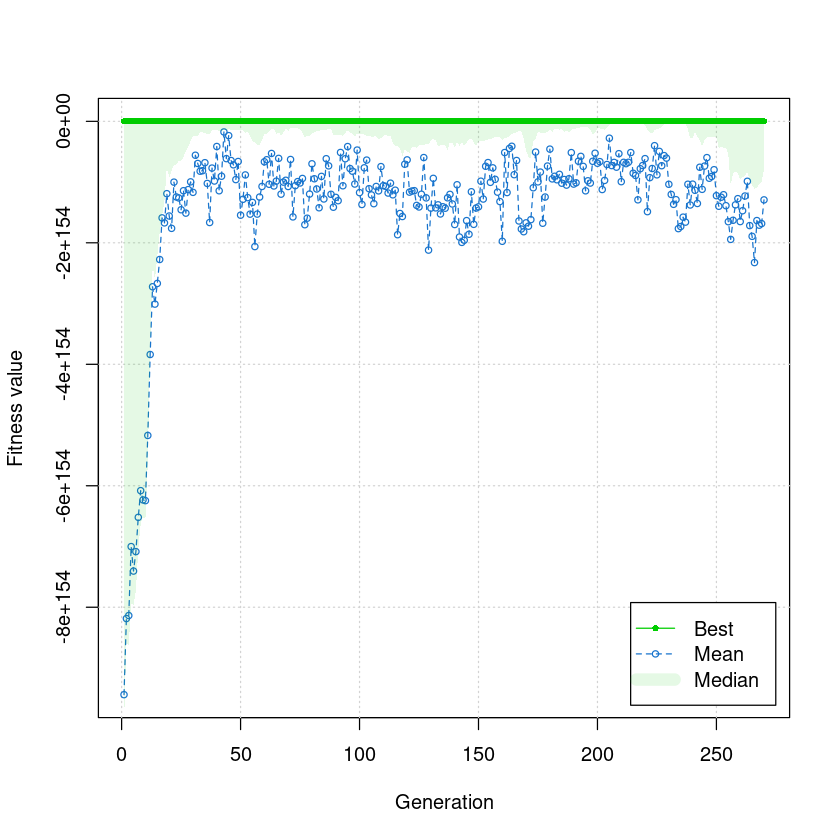

In [26]:
plot(GA)

##### <font color='purple'>Hybrid GA</font>

* after identifying promising solution candidates run a local search method to find even better solutions in their neighbourhood

define local optimization parameters

In [27]:
optimArgs = list(method = "L-BFGS-B",
                 poptim =0.5,
                 pressel = 0.5,
                 control = list(fnscale = -1, maxit = 100))

In [28]:
GA <- ga(type = "real-valued",
         fitness = function(x) -Rastrigin(x[1], x[2]),
         lower = c(-5.12, -5.12),
         upper = c(5.12, 5.12),
         maxiter = 1000,
         run = 100,
         popSize = 50,
         optim = TRUE)

local search can improve promising solution even further

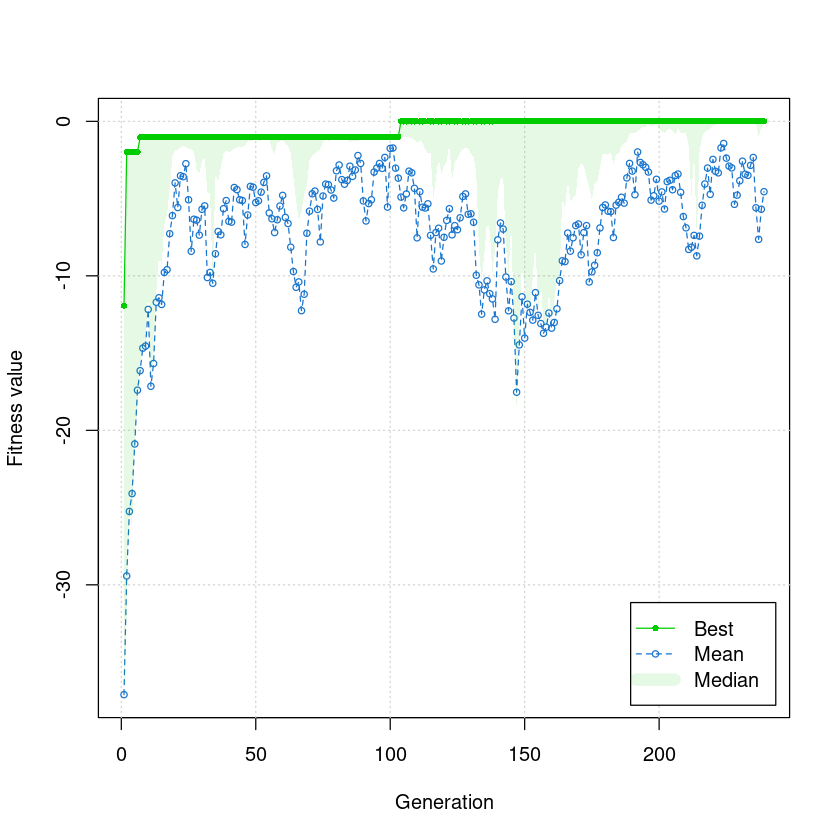

In [29]:
plot(GA)

#### <font color='green'>Genetic algorithm (GENALG)</font>

* only handles minimization tasks
* crossover probability of 0.8 means 80% candidates of current poputlation will generate new candidates via crossover
* `rbga.bin` used for integer problems, `rbga` for real-valued ones

In [50]:
library(genalg)
library(ggplot2)

##### <font color='orange'>Bag prices</font>

set number of different products

In [14]:
D = 5

set maximum price point

In [15]:
MaxPrice = 1000

size of each price in bits

In [16]:
Dim = ceiling(log(MaxPrice, 2))

total number of bits for a solution (all product prices)

In [17]:
size = D * Dim

subfunction for binint function

In [18]:
intbin = function(x){
    
    sum(2^(which(rev(x == 1)) - 1))
    
}

each price is encoded in 10 binary digits (if D = 5, final solution will have 5 * 10 = 50 binary digits). In order to get the actual prices this functions is used to convert them back.

In [19]:
binint = function(x){
    
    s = vector(length = D)
    
    for(i in 1:D){
        
        ini = (i-1) * Dim + 1; end = ini + Dim -1
        s[i] = intbin(x[ini:end])
        
    }
    return(s)
    
}

wrapper around original profit function. Used to transform binary input to integer values to calculate profit. Repair function to avoid exceeding set maximum price and turning minimization task to maximization.

In [20]:
bprofit = function(x){
    
    s = binint(x)
    s = ifelse(s > MaxPrice, MaxPrice, s) # repair function to avoid exceeding MaxPrice
    f = -profit(s) # adaption for maximization
    return(f)
    
}

In [22]:
G = rbga.bin(size = size,
             popSize = 50,
             iters = 100,
             zeroToOneRatio = 1, 
             evalFunc = bprofit, 
             elitism = 1)

get index of best solution

In [31]:
b = which.min(G$evaluations)

best function value

In [33]:
G$evaluations[b]

[1] -43790

best solution

In [55]:
binint(G$population[b, ])

[1] 414 404 375 356 395

In [45]:
summary(G, echo = T)

GA Settings
  Type                  = binary chromosome
  Population size       = 50
  Number of Generations = 100
  Elitism               = 1
  Mutation Chance       = 0.0196078431372549

Search Domain
  Var 1 = [,]
  Var 0 = [,]

GA Results
  Best Solution : 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 


visualization

In [35]:
pdf("genalg1.pdf")

pdf 
  3

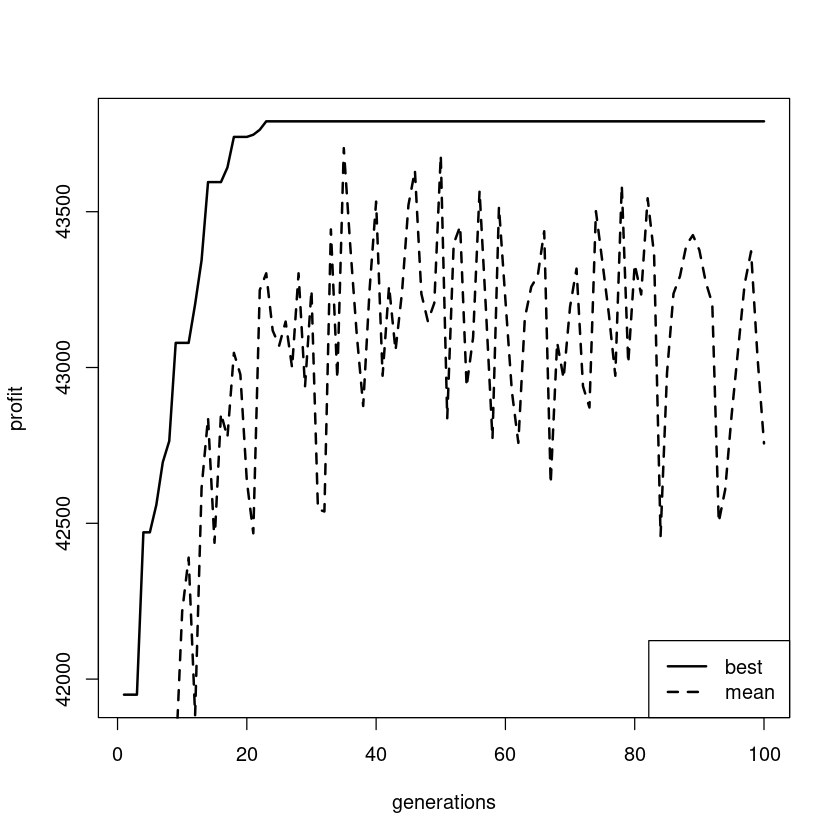

In [48]:
plot(-G$best, type = "l", lwd = 2, ylab = "profit", xlab = "generations")
lines(-G$mean, lty = 2, lwd = 2)
legend("bottomright", c("best", "mean"), lty = 1:2, lwd = 2)
dev.off()

##### <font color='orange'>Sphere</font>

number of dimensions

In [64]:
D = 2

number of iterations

In [93]:
maxit = 100

In [92]:
monitor = function(obj){
    
    if(i == 1){
        
        plot(obj$population,
             xlim = c(-5.2, 5.2),
             ylim = c(-5.2, 5.2),
             xlab = "x1",
             ylab = "x2",
             type = "p",
             pch = 16,
             col = gray(1 - i / maxit))
        
    } else if(i %% K == 0){
        
        points(obj$population,
               pch = 16,
               col = gray(1 - i / maxit))
        
    }
    
    i <<- i + 1
    
}

parameters for monitor function

In [94]:
K = 5

In [95]:
i = 1

In [96]:
pdf("genalg2.pdf", width = 5, height = 5)

In [97]:
set.seed(12345)

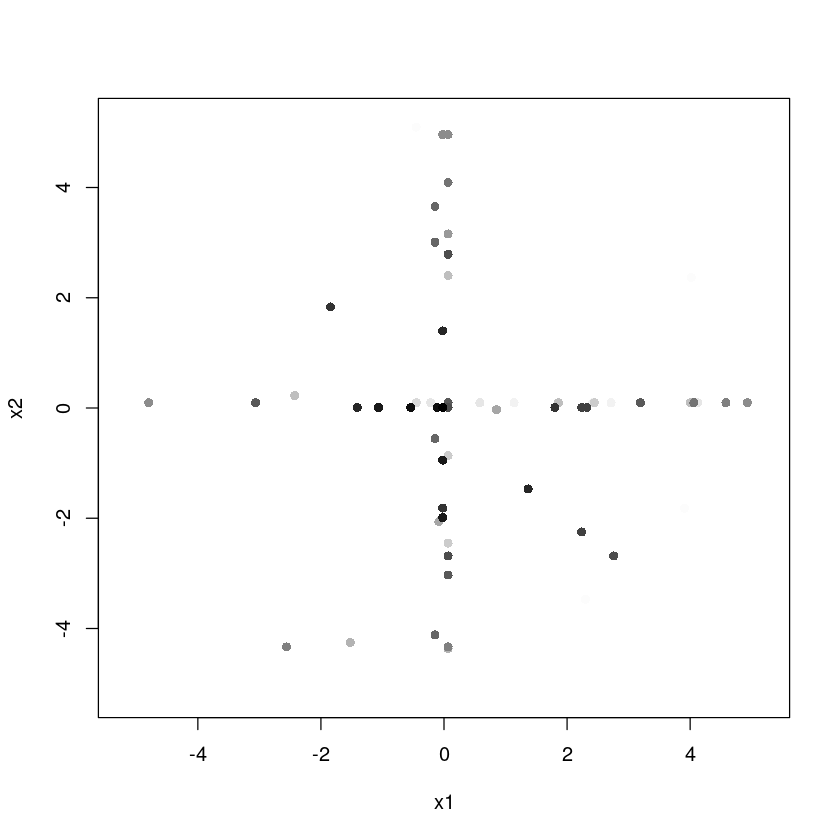

In [98]:
E = rbga(rep(-5.2, D), rep(5.2, D), popSize = 5, iters = maxit, monitorFunc = monitor, evalFunc = sphere)

In [84]:
summary(E, echo = T)

GA Settings
  Type                  = floats chromosome
  Population size       = 5
  Number of Generations = 100
  Elitism               = 1
  Mutation Chance       = 0.333333333333333

Search Domain
  Var 1 = [-5.2,5.2]
  Var 2 = [-5.2,5.2]

GA Results
  Best Solution : -0.0210574723744394 0.00909309089541432 


#### <font color='green'>Differential evolution (DE)</font>

* used for real-valued problems
* DE operators only work in metric spaces
* unlike genetic algorithm uses arithmetic operators to create new solutions (not mutation or crossover)
* `DEoptim` performs minimization

In [2]:
library(DEoptim)

Loading required package: parallel

DEoptim package
Differential Evolution algorithm in R
Authors: D. Ardia, K. Mullen, B. Peterson and J. Ulrich



##### <font color='orange'>Sphere</font>

In [40]:
set.seed(12345)

number of dimensions

In [41]:
D = 2

maximum number of iterations

In [42]:
maxit = 100

set control parameters

In [43]:
C = DEoptim.control(strategy = 1,
                    NP = 10, # population size
                    itermax = maxit,
                    CR = 0.9, # crossover probability
                    F = 0.8, # differential weighting factor
                    trace = 25, # report after every 25 iterations
                    storepopfrom = 1, # required for plot
                    storepopfreq = 1) # required for plot

In [44]:
D = suppressWarnings(DEoptim(sphere, rep(-5.2, D), rep(5.2, D), control = C))

Iteration: 25 bestvalit: 0.003839 bestmemit:   -0.047663    0.039589
Iteration: 50 bestvalit: 0.000000 bestmemit:   -0.000492    0.000251
Iteration: 75 bestvalit: 0.000000 bestmemit:   -0.000004    0.000002
Iteration: 100 bestvalit: 0.000000 bestmemit:   -0.000000    0.000000


In [45]:
summary(D)


***** summary of DEoptim object ***** 
best member   :  0 0 
best value    :  0 
after         :  100 generations 
fn evaluated  :  202 times 
*************************************


`storepop` arguments save all solutions in each generation

In [55]:
D$member$storepop

,par1,par2
1,2.29740052,-4.8408315
2,3.90804121,-3.6153157
3,2.71421621,2.4511235
4,4.01569549,-5.1881795
5,-0.45259801,-1.1314853
6,-3.46973343,-0.3900556
7,-1.81900798,-1.1633026
8,0.09593309,-1.0141545
9,2.36813464,-3.3387787
10,5.09326415,4.6972510


visualization

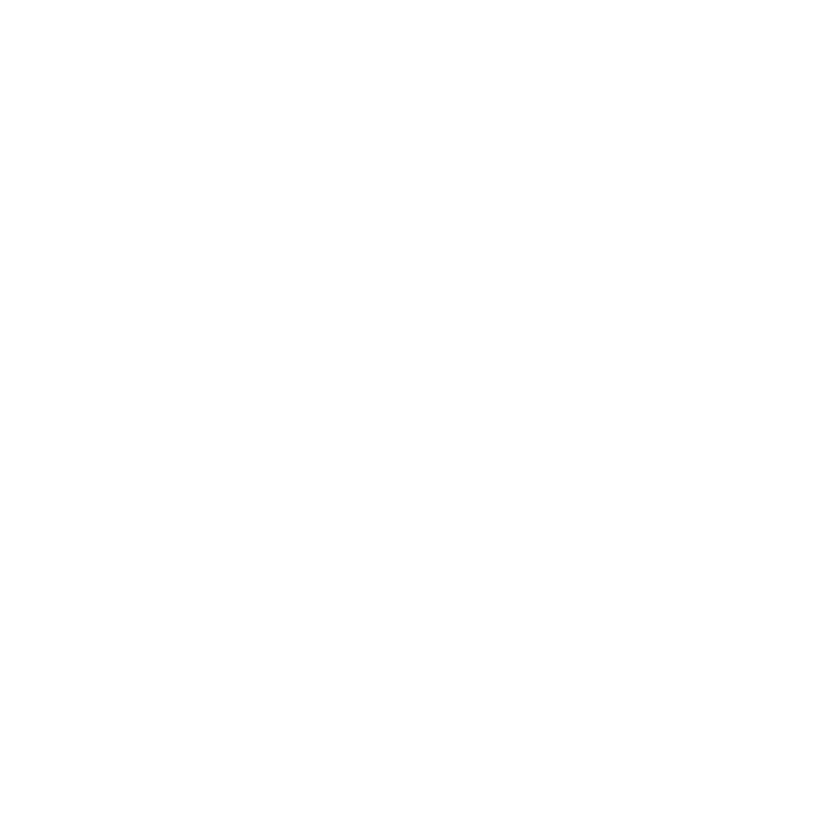

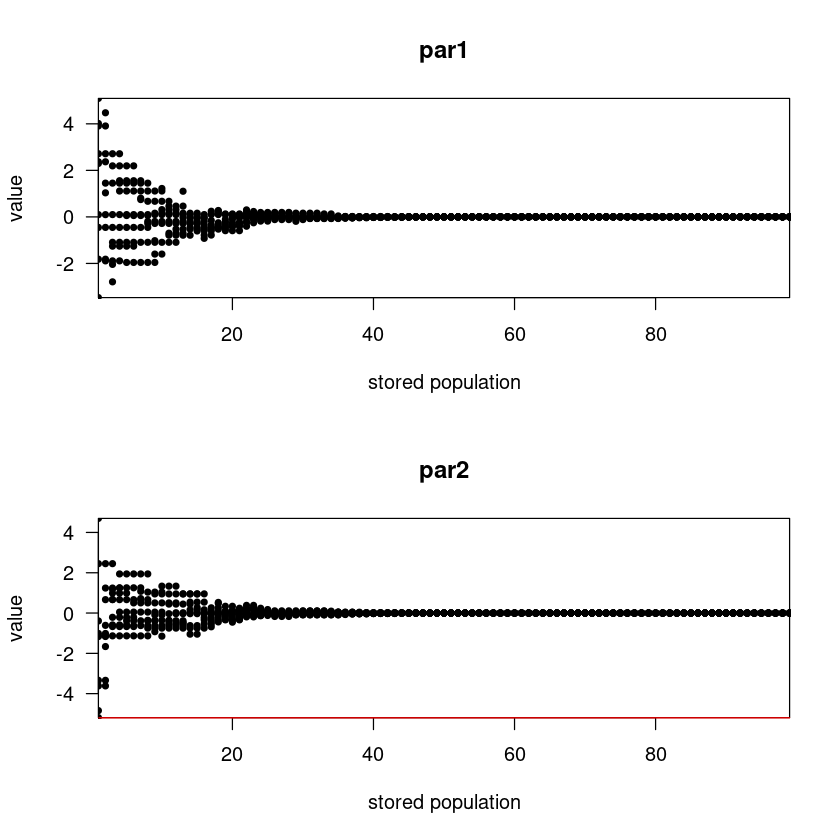

In [58]:
plot(D, plot.type = "storepop", xaxs = "i", yaxs = "i")

#### <font color='green'>Particle swarm optimization (PSO)</font>

* belongs to swarm intelligence algorithms (like e.g. ant colony)
* direct and indirect interactions between agents
* operates mostly on metric spaces
* each particle (agent) has its own memory, consisting of: previous best position found by the particle (p) and previous best position found in its neighbourhood (l)
* particles can exchange information about each others memory
* each particle (agent) has a position in search space (s), fitness value (f), velocity to compute next position (v) 
* `pso` package implements SPSO 2007 and SPSO 2011

##### <font color='orange'>Sphere</font>

In [5]:
set.seed(12345)

In [2]:
library(pso)

number of dimensions

In [3]:
D = 2

maximum number of iterations

In [74]:
maxit = 10

swarm size

In [75]:
s = 5

set parameters

In [76]:
2

run optimization

In [77]:
PSO = psoptim(rep(NA, D), fn = sphere, lower = rep(-5.2, D), upper = rep(5.2, D), control = C)

S=5, K=3, p=0.488, w0=0.7213, w1=0.7213, c.p=1.193, c.g=1.193
v.max=NA, d=14.71, vectorize=FALSE, hybrid=off
It 1: fitness=1.378
It 2: fitness=1.378
It 3: fitness=1.378
It 4: fitness=1.378
It 5: fitness=1.378
It 6: fitness=1.133
It 7: fitness=0.4787
It 8: fitness=0.3625
It 9: fitness=0.3625
It 10: fitness=0.02805
Maximal number of iterations reached


best solution

In [85]:
PSO$par

[1] 0.06849347 0.15282674

best fitness value

In [86]:
PSO$value

[1] 0.02804737

visualization

In [78]:
pdf("psoptim1.pdf", width = 5, height = 5)

pdf 
  3

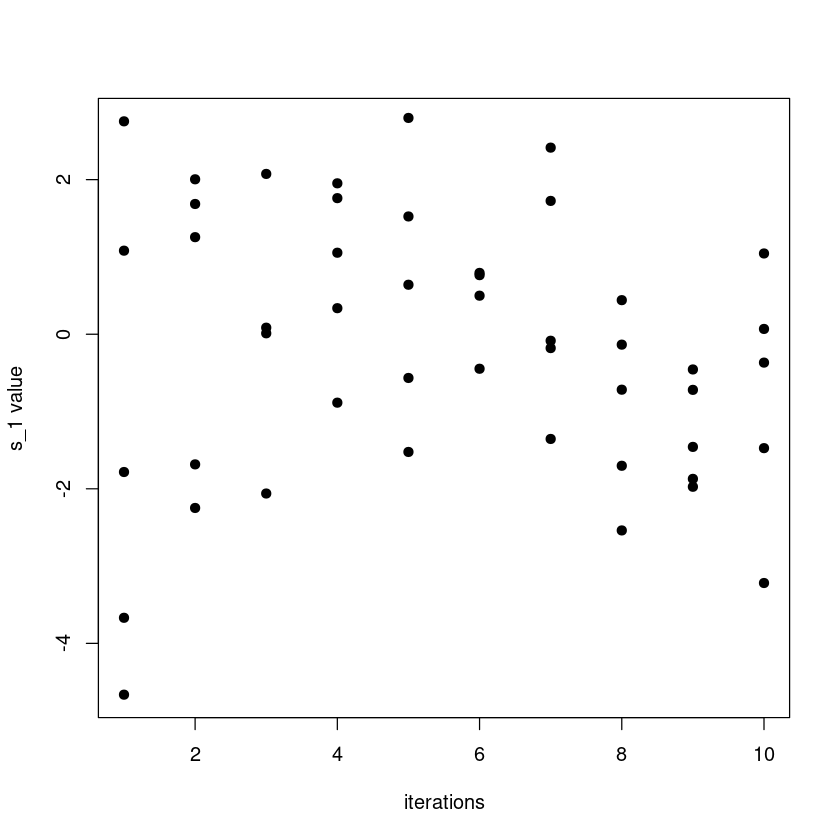

In [79]:
j = 1

plot(xlim = c(1, maxit), 
     rep(1, s), 
     PSO$stats$x[[1]][j, ], 
     pch = 19, 
     xlab = "iterations", 
     ylab = paste("s_", j, " value", sep = ""))

for(i in 2:maxit){
    
    points(rep(i, s), PSO$stats$x[[i]][j, ], pch = 19)
    
}

dev.off()

In [82]:
pdf("psoptim2.pdf", width = 5, height = 5)

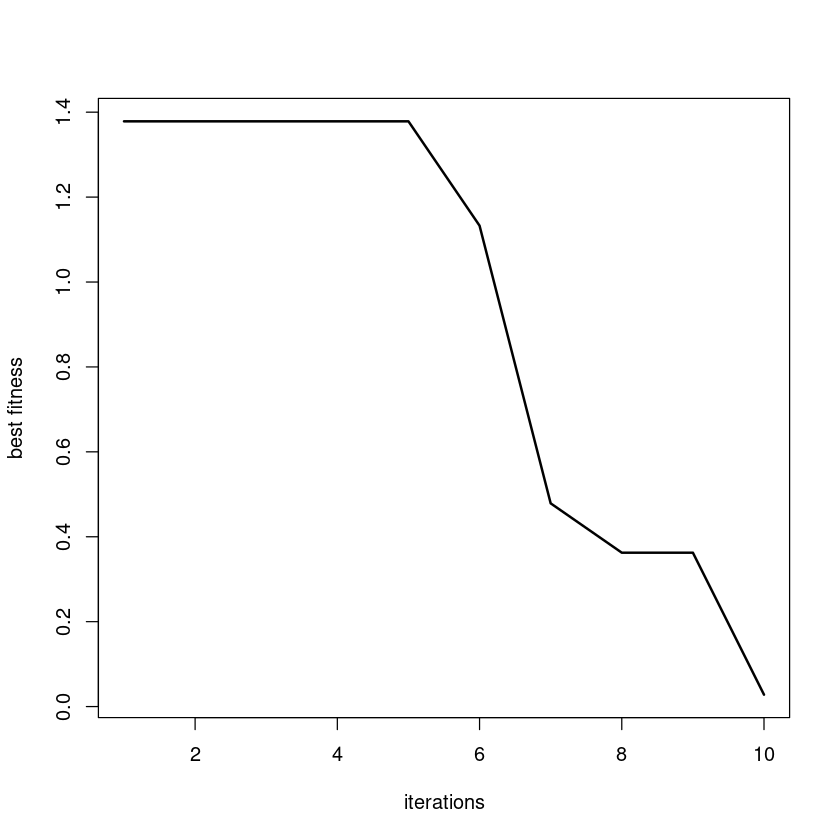

In [83]:
plot(PSO$stats$error, type = "l", lwd = 2, xlab = "iterations", ylab = "best fitness")

#### <font color='green'>Estimation of distribution algorithm (EDA)</font>

#### <font color='green'>Genetic programming (GP)</font>

## <font color='red'>Multi-objective optimization</font>